In [2]:
from cluster_analitics import optim as op
from cluster_analitics.analitics import ReductionDim, Analisis
from cluster_analitics import plotter as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import random as rn
import json

In [3]:
import pandas as pd
import numpy as np
import random
random.seed(1)
def balancedCut(df ,n ,frac = [0.5], target = 'Class',classes=[0,1]):
    print(f'{"="*50}\nbalancedCut\n{"="*50}')
    print(f'Realizando seleccion de la muestra la muestra')
    newDfs = []
    if sum(frac) > 1:
        print(f'Valor de la fraccion incorrecto: --> {sum(frac)} > 1')
        
    if len(frac) < len(classes):
        frac.append(1-sum(frac))
    
    for cl,fc in zip(classes, frac):
        ndf = df[df[target]==cl]
        ro = ndf.shape[0]
        print(f'Dataset de clase --> {cl}')
        if int(fc*n) > ro:
            newDfs.append(ndf)
            print(f'\tFilas: {ro}')
        else:
            newDfs.append(ndf.sample(n=int(fc*n)))
            print(f'\tFilas: {int(fc*n)}')
    
    return pd.concat(newDfs), newDfs[1].shape[0]/newDfs[0].shape[0]

In [4]:
random.seed(1)
cards = pd.read_csv("./creditcard.csv")
cards = cards.sample(frac=1)


cards.head()

df, frac = balancedCut(cards, 30000, frac=[0.9])
x = df.iloc[:,0:-1].to_numpy()

y = df.iloc[:,-1].to_numpy() 
scaler = StandardScaler()
x = scaler.fit_transform(x)

balancedCut
Realizando seleccion de la muestra la muestra
Dataset de clase --> 0
	Filas: 27000
Dataset de clase --> 1
	Filas: 492


In [5]:
frac

0.018222222222222223

In [6]:
#reduccion={'pca':{'finalDim':[2,4,6]},
#           'encoder':{'capas':[[512,128]], 'finalDim':[2,4,6], 'batch_size':16, 'epochs':20 }}
reduccion={'encoder':{'capas':[[1024],[512],[128],[32],[16],[32,16,8]], 'finalDim':[2,4,8], 'batch_size':4, 'epochs':50 }}

In [7]:
#modelos = {'isoForest':{'contamination':[0.2, frac,0.01,-1]},
#          'som':{'sigma':0.2, 'learning_rate':0.2, 'neighborhood_function':'gaussian', 'outliers_percentage':0.15, 'epochs':100}}
modelos = {'isoForest':{'contamination':[0.2, frac,0.01,-1]},
           'som':{'sigma':0.2, 'learning_rate':0.2, 'neighborhood_function':'gaussian', 'outliers_percentage':[0.15,0.12,0.101], 'epochs':100},
           'dbscan':{'eps':0.5,'min_samples':[8,14,20]}}

In [8]:
# seed
#    999
#    888

#rn.set_seed(888)
obj = op.main(x,y,reduccion=reduccion,analisis=modelos)

2022-04-21 09:40:47.494586: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-21 09:40:47.494842: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 Ti computeCapability: 6.1
coreClock: 1.455GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 104.43GiB/s
2022-04-21 09:40:47.494887: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-21 09:40:47.494933: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-04-21 09:40:47.494962: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-04-21 09:40:47.494990: I tensorflow/stream_execu

Epoch 1/50


2022-04-21 09:40:48.344219: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


6873/6873 [==============================] - 11s 1ms/step - loss: 0.9891 - val_loss: 0.9380
Epoch 2/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.9320 - val_loss: 0.9245
Epoch 3/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8673 - val_loss: 0.9172
Epoch 4/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.9563 - val_loss: 0.9097
Epoch 5/50
6873/6873 [==============================] - 10s 1ms/step - loss: 0.9324 - val_loss: 0.9118
Epoch 6/50
6873/6873 [==============================] - 10s 1ms/step - loss: 0.9481 - val_loss: 0.9089
Epoch 7/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.9344 - val_loss: 0.9053
Epoch 8/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.9127 - val_loss: 0.9092
Epoch 9/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8885 - val_loss: 0.9047
Epoch 10/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8877 - val_

Epoch 31/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8782 - val_loss: 0.8561
Epoch 32/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8800 - val_loss: 0.8369
Epoch 33/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.9023 - val_loss: 0.8340
Epoch 34/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8041 - val_loss: 0.8393
Epoch 35/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8462 - val_loss: 0.8355
Epoch 36/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8138 - val_loss: 0.8369
Epoch 37/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8817 - val_loss: 0.8342
Epoch 38/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8295 - val_loss: 0.8361
Epoch 39/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8296 - val_loss: 0.8423
Epoch 40/50
6873/6873 [==============================] - 8s 1ms/step - lo

6873/6873 [==============================] - 9s 1ms/step - loss: 0.8904 - val_loss: 0.9069
Epoch 11/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8852 - val_loss: 0.9108
Epoch 12/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8892 - val_loss: 0.9041
Epoch 13/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.9395 - val_loss: 0.9061
Epoch 14/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.9191 - val_loss: 0.9006
Epoch 15/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.9181 - val_loss: 0.8996
Epoch 16/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8849 - val_loss: 0.8977
Epoch 17/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8953 - val_loss: 0.8945
Epoch 18/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8719 - val_loss: 0.8943
Epoch 19/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8924 -

6873/6873 [==============================] - 8s 1ms/step - loss: 0.8135 - val_loss: 0.8212
Epoch 40/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8062 - val_loss: 0.8188
Epoch 41/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.7963 - val_loss: 0.8202
Epoch 42/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8142 - val_loss: 0.8258
Epoch 43/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8129 - val_loss: 0.8199
Epoch 44/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8188 - val_loss: 0.8208
Epoch 45/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8402 - val_loss: 0.8181
Epoch 46/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.7999 - val_loss: 0.8158
Epoch 47/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8093 - val_loss: 0.8194
Epoch 48/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.7918 -

6873/6873 [==============================] - 10s 1ms/step - loss: 0.8616 - val_loss: 0.8859
Epoch 19/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8837 - val_loss: 0.8852
Epoch 20/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8839 - val_loss: 0.8852
Epoch 21/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8902 - val_loss: 0.8849
Epoch 22/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8568 - val_loss: 0.8823
Epoch 23/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8963 - val_loss: 0.8859
Epoch 24/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8637 - val_loss: 0.8817
Epoch 25/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8752 - val_loss: 0.8831
Epoch 26/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8824 - val_loss: 0.8815
Epoch 27/50
6873/6873 [==============================] - 10s 1ms/step - loss: 0.8619

6873/6873 [==============================] - 9s 1ms/step - loss: 0.8022 - val_loss: 0.8091
Epoch 48/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.7852 - val_loss: 0.8095
Epoch 49/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8190 - val_loss: 0.8110
Epoch 50/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8234 - val_loss: 0.8090
Epoch 1/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8934 - val_loss: 0.8050
Epoch 2/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8047 - val_loss: 0.7932
Epoch 3/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.7356 - val_loss: 0.7854
Epoch 4/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8256 - val_loss: 0.7812
Epoch 5/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.7975 - val_loss: 0.7770
Epoch 6/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8112 - val_l

Epoch 27/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8668 - val_loss: 0.8867
Epoch 28/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8842 - val_loss: 0.8877
Epoch 29/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.9160 - val_loss: 0.8853
Epoch 30/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8534 - val_loss: 0.8853
Epoch 31/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.9232 - val_loss: 0.8849
Epoch 32/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.9219 - val_loss: 0.8859
Epoch 33/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.9480 - val_loss: 0.8859
Epoch 34/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8490 - val_loss: 0.8852
Epoch 35/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8940 - val_loss: 0.8832
Epoch 36/50
6873/6873 [==============================] - 9s 1ms/step - lo

6873/6873 [==============================] - 8s 1ms/step - loss: 0.8231 - val_loss: 0.7852
Epoch 7/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8093 - val_loss: 0.7825
Epoch 8/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.7890 - val_loss: 0.7806
Epoch 9/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.7644 - val_loss: 0.7798
Epoch 10/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.7629 - val_loss: 0.7794
Epoch 11/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.7542 - val_loss: 0.7778
Epoch 12/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.7603 - val_loss: 0.7746
Epoch 13/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8063 - val_loss: 0.7733
Epoch 14/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.7871 - val_loss: 0.7719
Epoch 15/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.7889 - va

Epoch 36/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8808 - val_loss: 0.9037
Epoch 37/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.9463 - val_loss: 0.9037
Epoch 38/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8964 - val_loss: 0.9035
Epoch 39/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8955 - val_loss: 0.9031
Epoch 40/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8896 - val_loss: 0.9031
Epoch 41/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.8766 - val_loss: 0.9027
Epoch 42/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8956 - val_loss: 0.9025
Epoch 43/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8934 - val_loss: 0.9027
Epoch 44/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.9023 - val_loss: 0.9030
Epoch 45/50
6873/6873 [==============================] - 9s 1ms/step - lo

6873/6873 [==============================] - 8s 1ms/step - loss: 0.8099 - val_loss: 0.7905
Epoch 16/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.7772 - val_loss: 0.7901
Epoch 17/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.7890 - val_loss: 0.7907
Epoch 18/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.7664 - val_loss: 0.7898
Epoch 19/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.7867 - val_loss: 0.7902
Epoch 20/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.7888 - val_loss: 0.7888
Epoch 21/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.7930 - val_loss: 0.7896
Epoch 22/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.7603 - val_loss: 0.7879
Epoch 23/50
6873/6873 [==============================] - 8s 1ms/step - loss: 0.8007 - val_loss: 0.7875
Epoch 24/50
6873/6873 [==============================] - 9s 1ms/step - loss: 0.7695 -

6873/6873 [==============================] - 11s 2ms/step - loss: 0.8761 - val_loss: 0.8765
Epoch 45/50
6873/6873 [==============================] - 11s 2ms/step - loss: 0.8986 - val_loss: 0.8760
Epoch 46/50
6873/6873 [==============================] - 12s 2ms/step - loss: 0.8563 - val_loss: 0.8744
Epoch 47/50
6873/6873 [==============================] - 11s 2ms/step - loss: 0.8674 - val_loss: 0.8751
Epoch 48/50
6873/6873 [==============================] - 11s 2ms/step - loss: 0.8489 - val_loss: 0.8734
Epoch 49/50
6873/6873 [==============================] - 11s 2ms/step - loss: 0.8821 - val_loss: 0.8726
Epoch 50/50
6873/6873 [==============================] - 11s 2ms/step - loss: 0.8856 - val_loss: 0.8740
Epoch 1/50
6873/6873 [==============================] - 11s 2ms/step - loss: 0.9741 - val_loss: 0.8772
Epoch 2/50
6873/6873 [==============================] - 11s 2ms/step - loss: 0.8732 - val_loss: 0.8605
Epoch 3/50
6873/6873 [==============================] - 11s 2ms/step - loss: 0

6873/6873 [==============================] - 11s 2ms/step - loss: 0.7961 - val_loss: 0.7824
Epoch 24/50
6873/6873 [==============================] - 11s 2ms/step - loss: 0.7640 - val_loss: 0.7797
Epoch 25/50
6873/6873 [==============================] - 11s 2ms/step - loss: 0.7730 - val_loss: 0.7797
Epoch 26/50
6873/6873 [==============================] - 11s 2ms/step - loss: 0.7817 - val_loss: 0.7788
Epoch 27/50
6873/6873 [==============================] - 11s 2ms/step - loss: 0.7611 - val_loss: 0.7778
Epoch 28/50
6873/6873 [==============================] - 11s 2ms/step - loss: 0.7766 - val_loss: 0.7833
Epoch 29/50
6873/6873 [==============================] - 11s 2ms/step - loss: 0.8082 - val_loss: 0.7772
Epoch 30/50
6873/6873 [==============================] - 11s 2ms/step - loss: 0.7464 - val_loss: 0.7801
Epoch 31/50
6873/6873 [==============================] - 11s 2ms/step - loss: 0.8144 - val_loss: 0.7767
Epoch 32/50
6873/6873 [==============================] - 11s 2ms/step - loss

In [9]:
precision = []
recall = []
for o in obj:
    precision.append(o.precision())
    recall.append(o.recall())

plt.precisionRecall(precision,recall, engine = 'plotly')

0
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               3968      
_________________________________________________________________
bottleneck (Dense)           (None, 4)                 516       
_________________________________________________________________
dense_22 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_23 (Dense)             (None, 30)                3870      
Total params: 8,994
Trainable params: 8,994
Non-trainable params: 0
_________________________________________________________________
___________________________________________________________________________
Reduccion --> encoder
	Numero de parametros final --> 4
	Tamaño del batch --> 4
	Numero de epocas --> 50
___________________________________________________________________

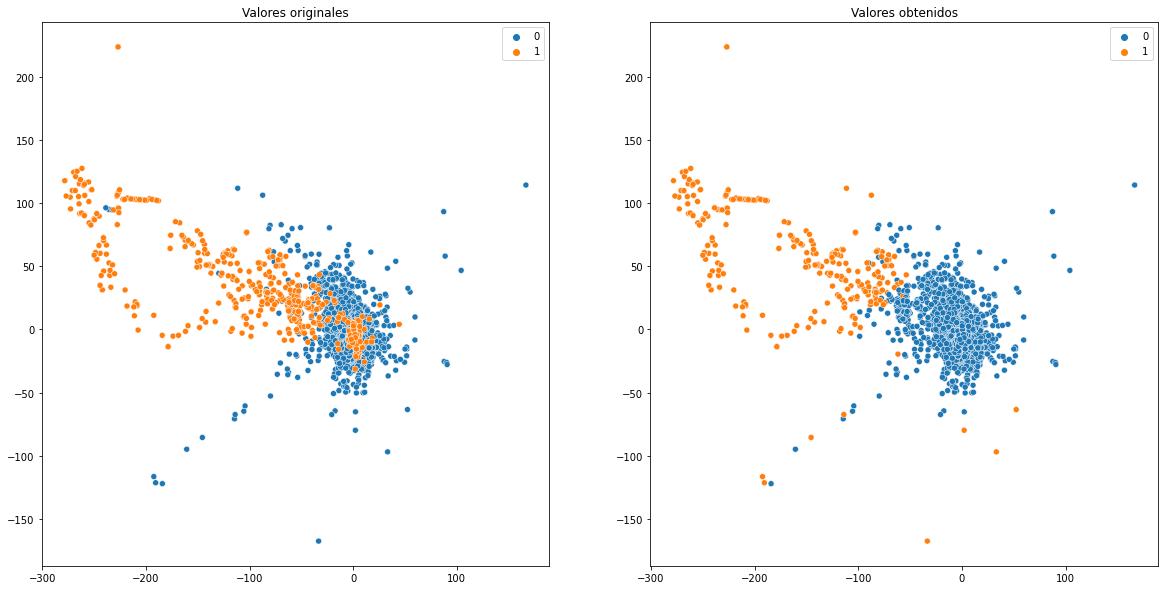

1
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               15872     
_________________________________________________________________
bottleneck (Dense)           (None, 4)                 2052      
_________________________________________________________________
dense_13 (Dense)             (None, 512)               2560      
_________________________________________________________________
dense_14 (Dense)             (None, 30)                15390     
Total params: 35,874
Trainable params: 35,874
Non-trainable params: 0
_________________________________________________________________
___________________________________________________________________________
Reduccion --> encoder
	Numero de parametros final --> 4
	Tamaño del batch --> 4
	Numero de epocas --> 50
_________________________________________________________________

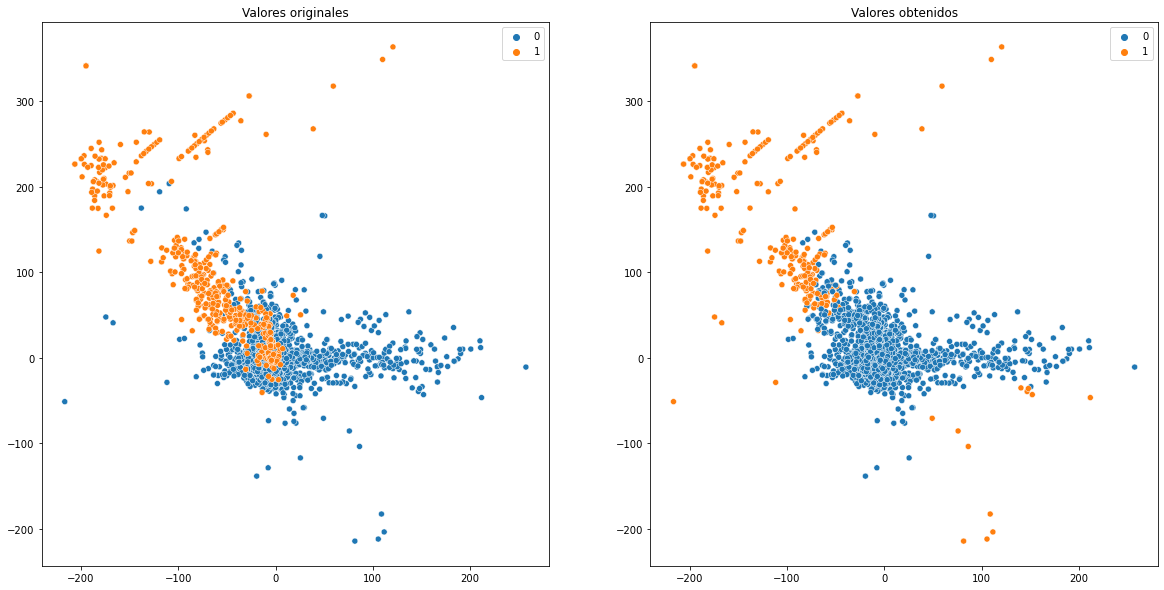

2
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               3968      
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 258       
_________________________________________________________________
dense_19 (Dense)             (None, 128)               384       
_________________________________________________________________
dense_20 (Dense)             (None, 30)                3870      
Total params: 8,480
Trainable params: 8,480
Non-trainable params: 0
_________________________________________________________________
___________________________________________________________________________
Reduccion --> encoder
	Numero de parametros final --> 2
	Tamaño del batch --> 4
	Numero de epocas --> 50
___________________________________________________________________

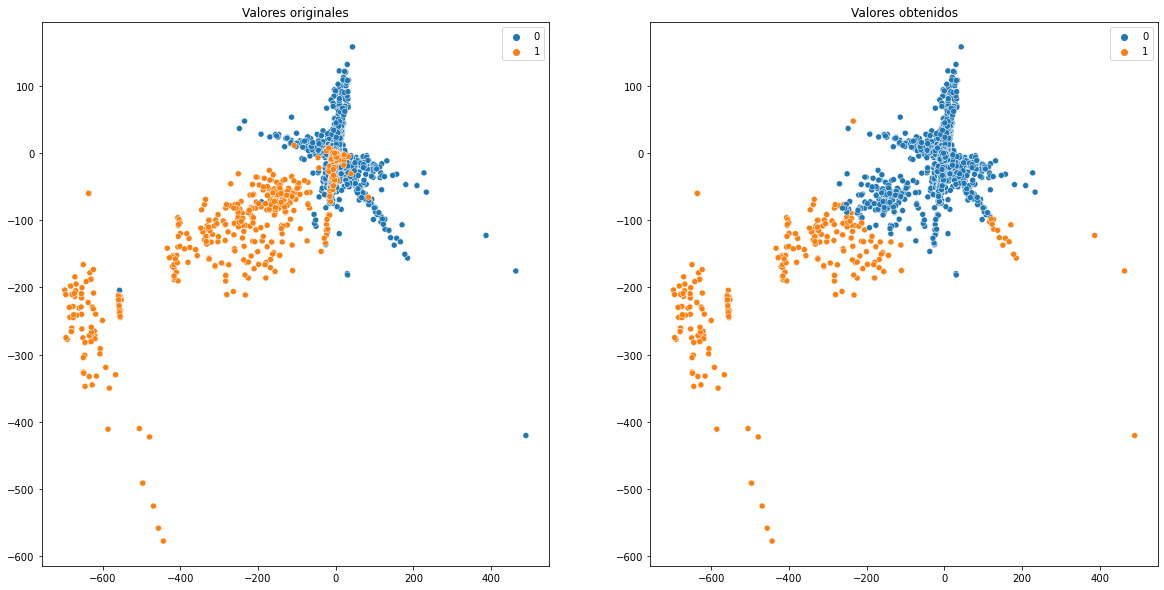

3
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               15872     
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 1026      
_________________________________________________________________
dense_10 (Dense)             (None, 512)               1536      
_________________________________________________________________
dense_11 (Dense)             (None, 30)                15390     
Total params: 33,824
Trainable params: 33,824
Non-trainable params: 0
_________________________________________________________________
___________________________________________________________________________
Reduccion --> encoder
	Numero de parametros final --> 2
	Tamaño del batch --> 4
	Numero de epocas --> 50
_________________________________________________________________

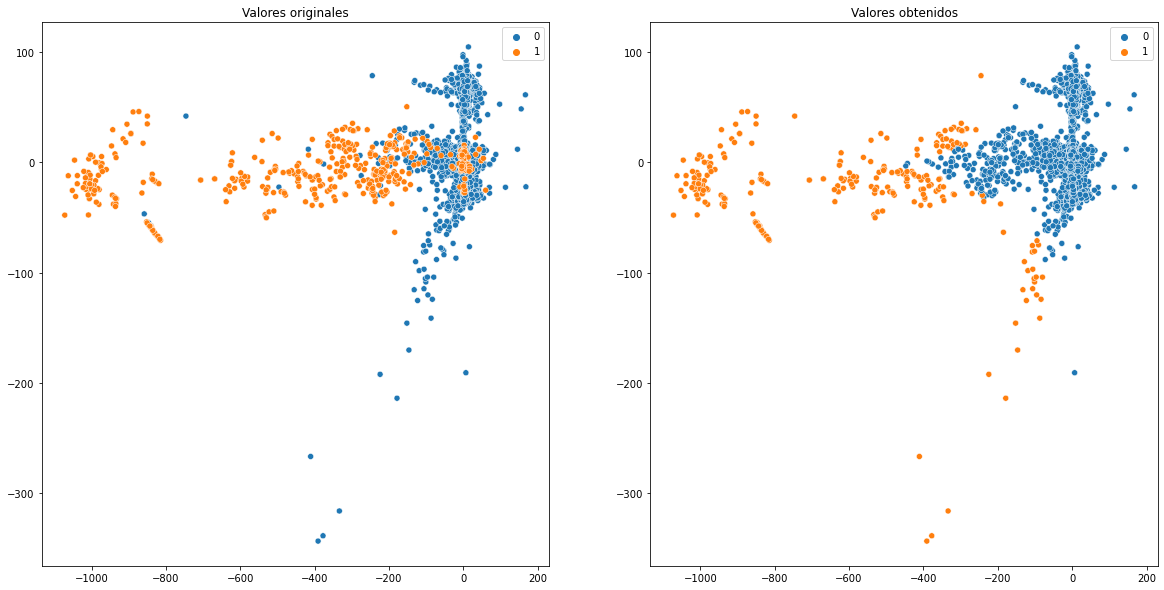

4
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                496       
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 34        
_________________________________________________________________
dense_37 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_38 (Dense)             (None, 30)                510       
Total params: 1,088
Trainable params: 1,088
Non-trainable params: 0
_________________________________________________________________
___________________________________________________________________________
Reduccion --> encoder
	Numero de parametros final --> 2
	Tamaño del batch --> 4
	Numero de epocas --> 50
__________________________________________________________________

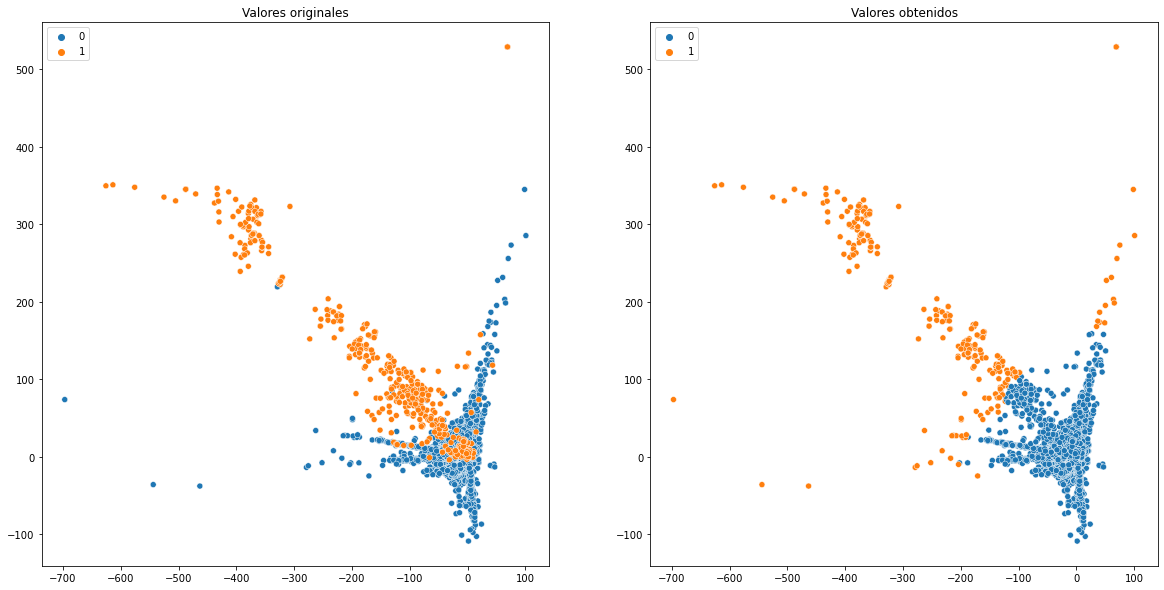

5
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               15872     
_________________________________________________________________
bottleneck (Dense)           (None, 8)                 4104      
_________________________________________________________________
dense_16 (Dense)             (None, 512)               4608      
_________________________________________________________________
dense_17 (Dense)             (None, 30)                15390     
Total params: 39,974
Trainable params: 39,974
Non-trainable params: 0
_________________________________________________________________
___________________________________________________________________________
Reduccion --> encoder
	Numero de parametros final --> 8
	Tamaño del batch --> 4
	Numero de epocas --> 50
_________________________________________________________________

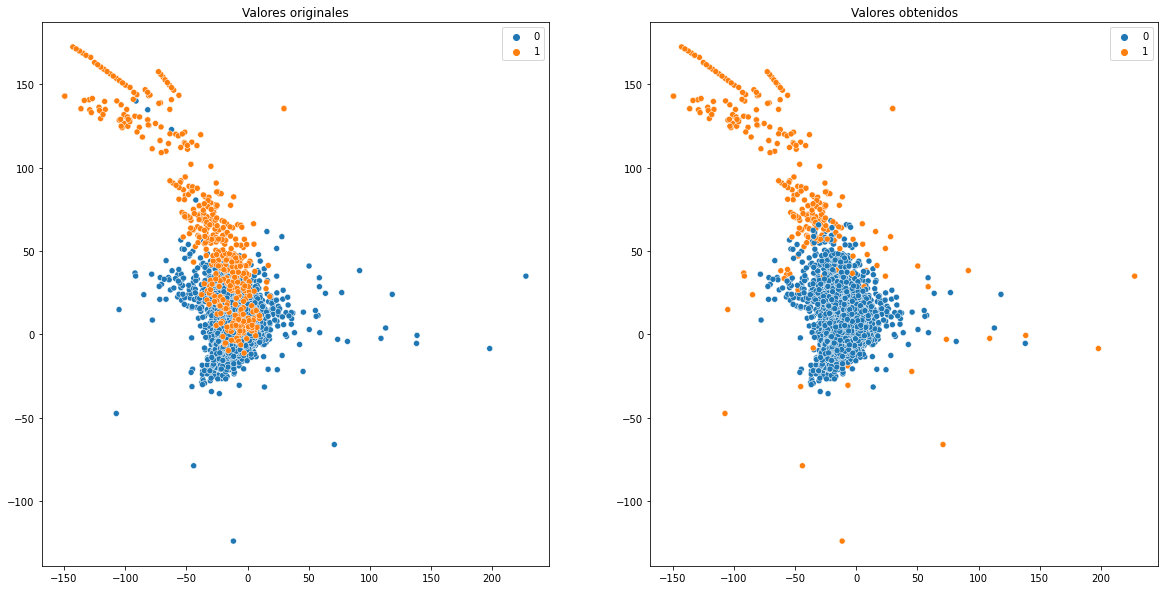

6
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_46 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_47 (Dense)             (None, 8)                 136       
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 18        
_________________________________________________________________
dense_48 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_49 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_50 (Dense)             (None, 32)            

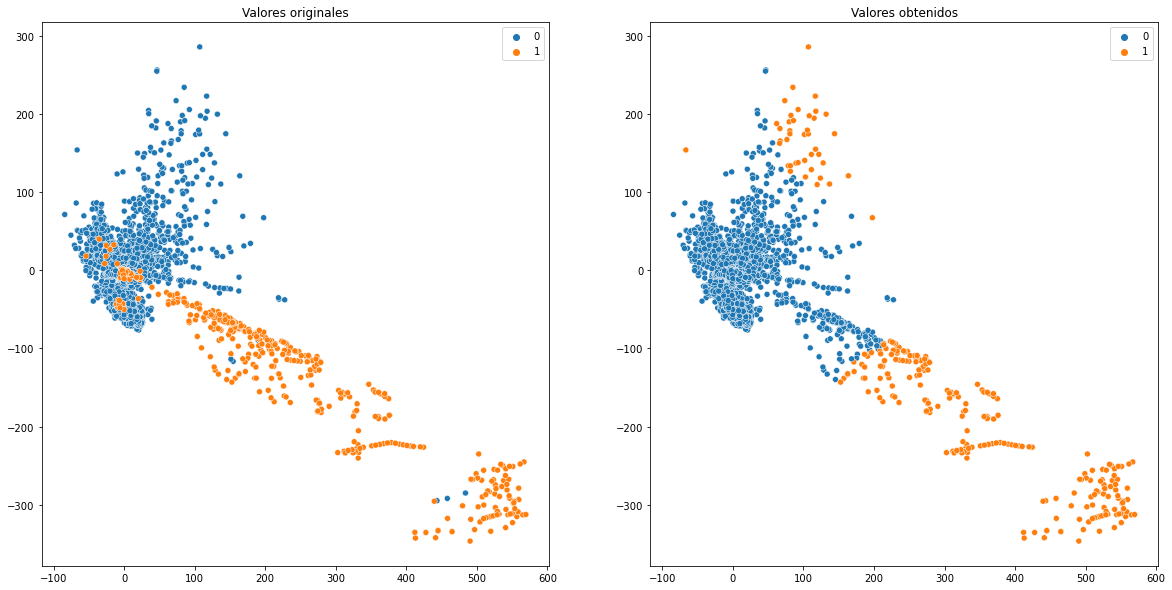

7
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 32)                992       
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 66        
_________________________________________________________________
dense_28 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_29 (Dense)             (None, 30)                990       
Total params: 2,144
Trainable params: 2,144
Non-trainable params: 0
_________________________________________________________________
___________________________________________________________________________
Reduccion --> encoder
	Numero de parametros final --> 2
	Tamaño del batch --> 4
	Numero de epocas --> 50
___________________________________________________________________

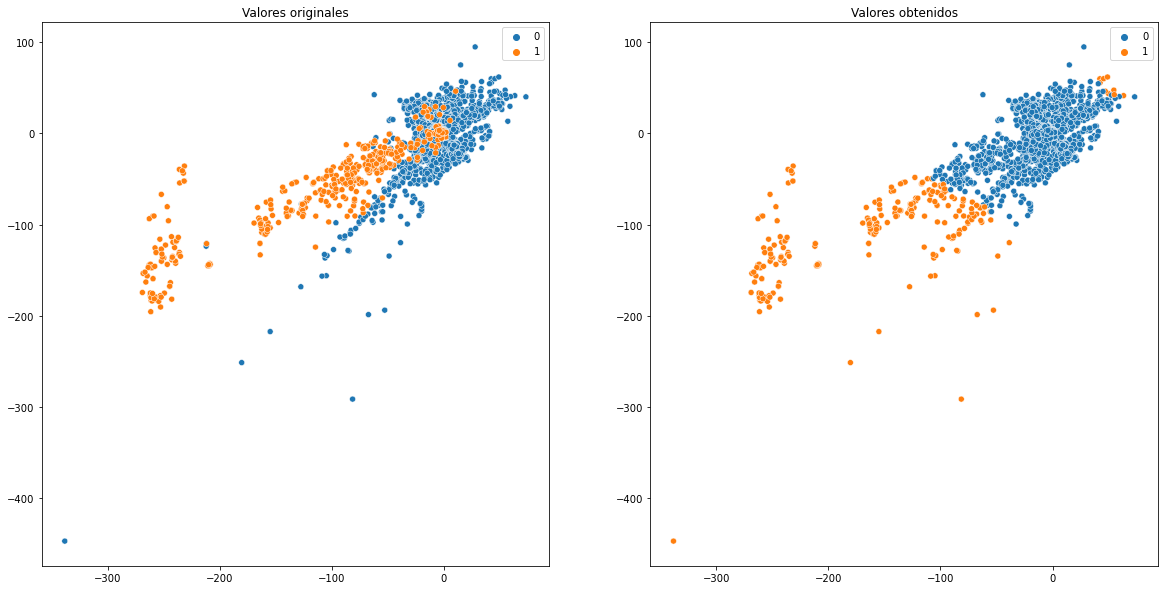

8
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              31744     
_________________________________________________________________
bottleneck (Dense)           (None, 4)                 4100      
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              5120      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                30750     
Total params: 71,714
Trainable params: 71,714
Non-trainable params: 0
_________________________________________________________________
___________________________________________________________________________
Reduccion --> encoder
	Numero de parametros final --> 4
	Tamaño del batch --> 4
	Numero de epocas --> 50
_________________________________________________________________

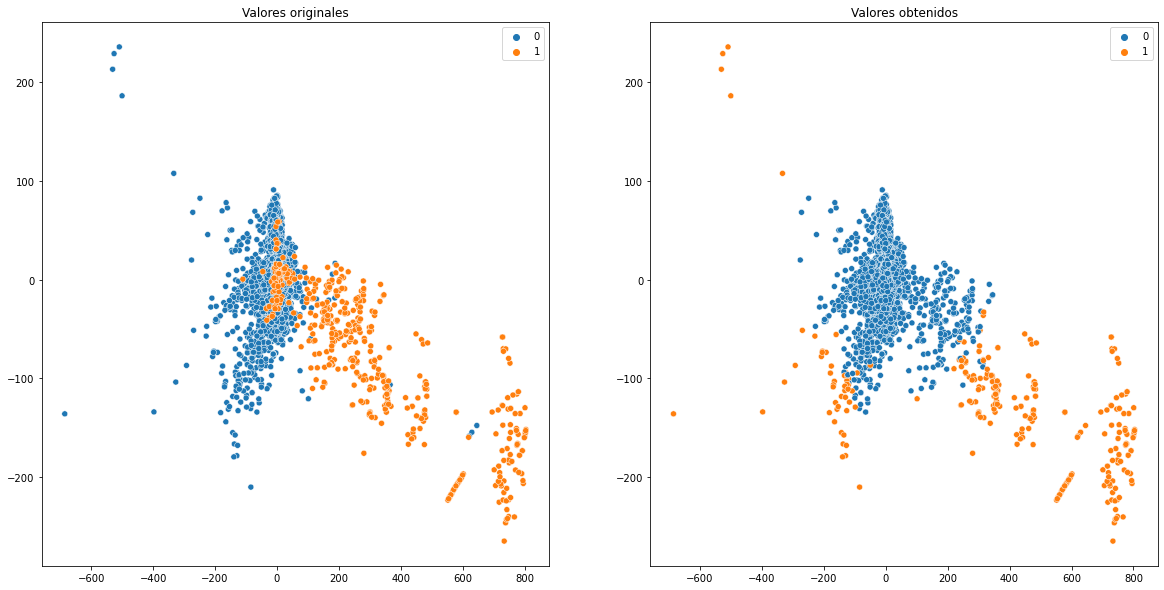

9
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               3968      
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 258       
_________________________________________________________________
dense_19 (Dense)             (None, 128)               384       
_________________________________________________________________
dense_20 (Dense)             (None, 30)                3870      
Total params: 8,480
Trainable params: 8,480
Non-trainable params: 0
_________________________________________________________________
___________________________________________________________________________
Reduccion --> encoder
	Numero de parametros final --> 2
	Tamaño del batch --> 4
	Numero de epocas --> 50
___________________________________________________________________

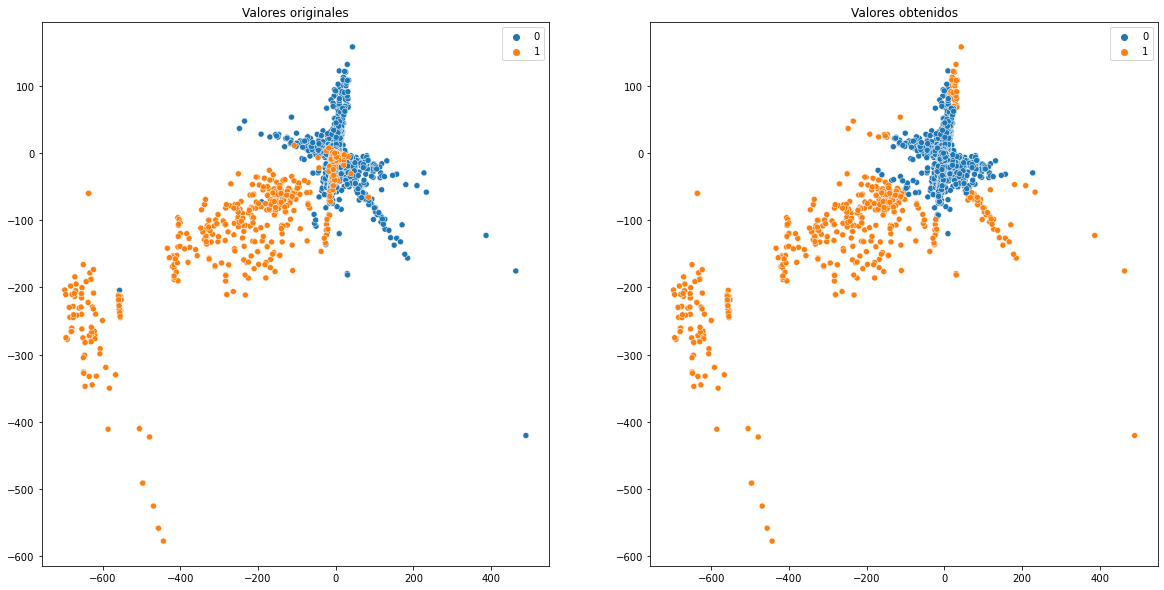

10
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 32)                992       
_________________________________________________________________
bottleneck (Dense)           (None, 4)                 132       
_________________________________________________________________
dense_31 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_32 (Dense)             (None, 30)                990       
Total params: 2,274
Trainable params: 2,274
Non-trainable params: 0
_________________________________________________________________
___________________________________________________________________________
Reduccion --> encoder
	Numero de parametros final --> 4
	Tamaño del batch --> 4
	Numero de epocas --> 50
_________________________________________________________________

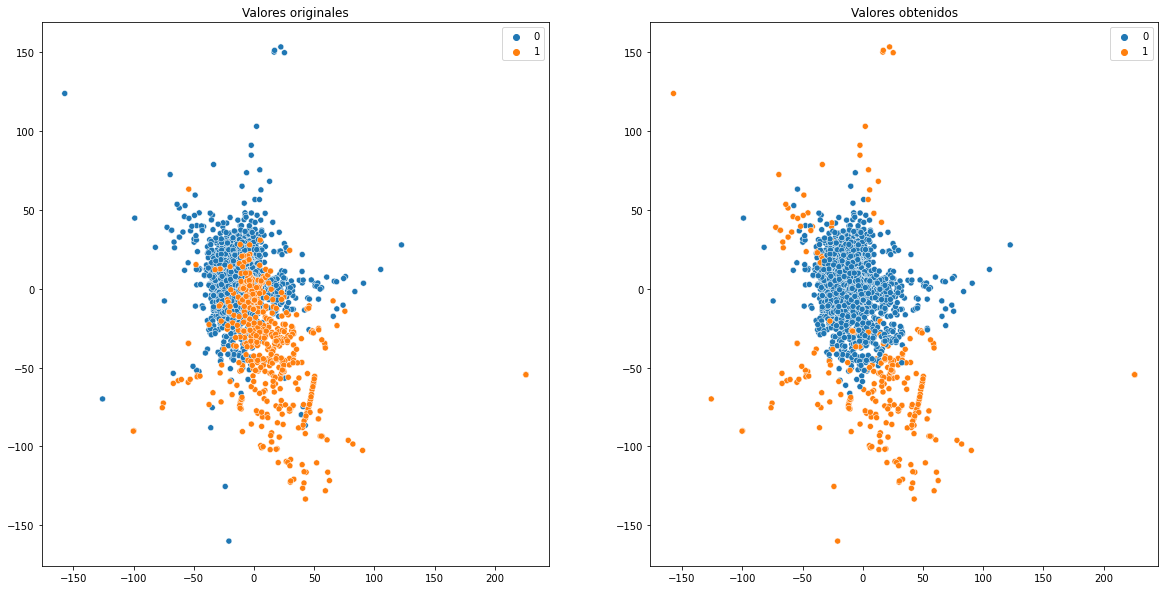

11
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               15872     
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 1026      
_________________________________________________________________
dense_10 (Dense)             (None, 512)               1536      
_________________________________________________________________
dense_11 (Dense)             (None, 30)                15390     
Total params: 33,824
Trainable params: 33,824
Non-trainable params: 0
_________________________________________________________________
___________________________________________________________________________
Reduccion --> encoder
	Numero de parametros final --> 2
	Tamaño del batch --> 4
	Numero de epocas --> 50
________________________________________________________________

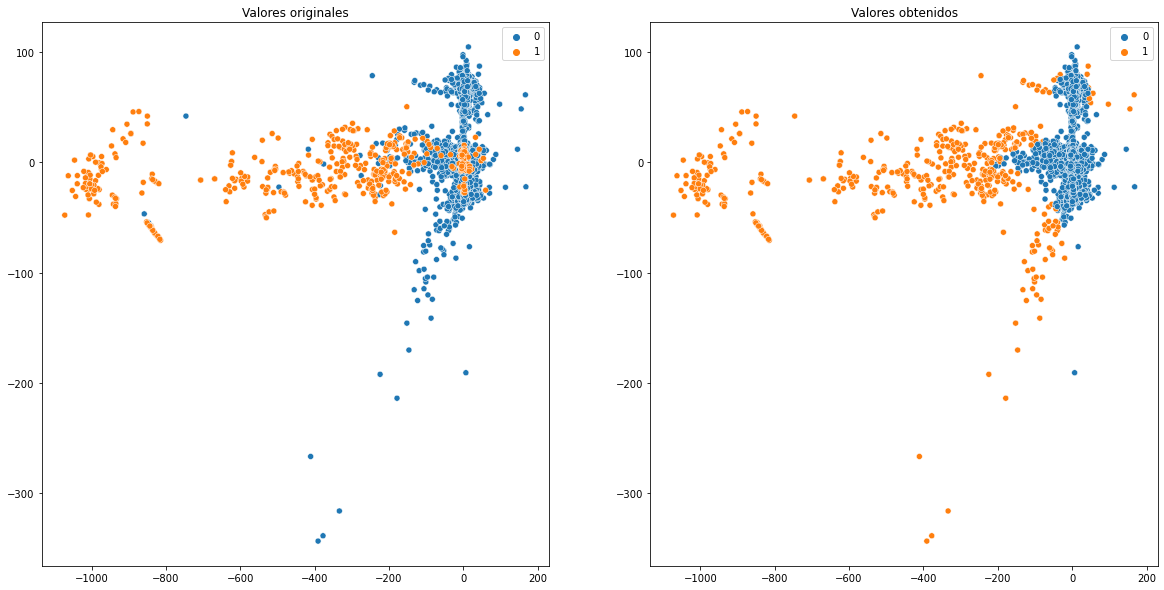

In [14]:
new = []
for n in range(0, 12):
    print(n)
    print(obj[n],'\n',f'Precision: {obj[n].precision()}',f'\n Recall: {obj[n].recall()}\n' )
    
    print('='*75)
    print('|',' '*71,'|')
    print('='*75)
    x_final = obj[n].reduccion.predict()
    obj[n].analisis.setX(x_final)
    y_pred = obj[n].analisis.fit_predict()
    plt.compPlot(x_final,y,y_pred,dim=2, engine='seaborn')

In [12]:
bueno = obj[9]

x_n, y_n = bueno.predictXY()

plt.probPlot(x_n,y_n)

In [1]:

import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

2022-04-21 09:38:19.886080: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


2.4.1
Num GPUs Available:  1


2022-04-21 09:38:24.355519: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-21 09:38:24.356155: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-21 09:38:24.402515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-21 09:38:24.402953: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 Ti computeCapability: 6.1
coreClock: 1.455GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 104.43GiB/s
2022-04-21 09:38:24.403015: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-21 09:38:24.474486: I tensorflow/stream_executor/platform/

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1



2022-04-21 09:38:26.378400: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1261] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-04-21 09:38:26.378545: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      0 
2022-04-21 09:38:26.378566: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 0:   N 
2022-04-21 09:38:26.378998: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-21 09:38:26.379242: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-21 09:38:26.379415: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-

In [ ]:
parrafo = ''
for o in obj:
    fila=''
    if o.precision() > 0.7:
        
        if o.recall() > 0.6:
            
            fila+=''+str(x.shape[0])+';'
            if o.reduccion.reductionN == 'pca':
                fila += '{"type":"pca","n_components":'+str(o.reduccion.finalDim)+'};'
                
            elif o.reduccion.reductionN == 'encoder':
                fila += '{"type":"encoder","capas":'+str(o.reduccion.capas)+',"finalDim":'+str(o.reduccion.finalDim)+',"batch_size":'+str(o.reduccion.batch_size)+',"epochs":'+str(o.reduccion.epochs)+'};'
            if o.analisis.modeloN == 'lof':
                fila += '{"type":"lof","n_neighbors":'+str(o.analisis.n_neighbors)+',"contamination":'+str(o.analisis.contamination)+'};'
            elif o.analisis.modeloN == 'isoForest':
                fila += '{"type":"isoForest","contamination":'+str(o.analisis.contamination)+'};'
            elif o.analisis.modeloN == 'som':
                fila += '{"type":"som","sigma":'+str(o.analisis.sigma)+',"learning_rate":'+str(o.analisis.learning_rate)+',"neighborhood_function":'+o.analisis.neighborhood_function+',"outliers_percentage":'+str(o.analisis.outliers_percentage)+',"epochs":'+str(o.analisis.epochs)+'};'
            elif o.analisis.modeloN == 'dbscan':
                fila += '{"type":"som","eps":'+str(o.analisis.eps)+',"min_samples":'+str(o.analisis.min_samples)+'};'
            fila += f'{o.precision()};{o.recall()}'
        else:
            continue
    else:
        break
            
    parrafo += fila
    parrafo += '\n'
        

print(parrafo)

In [ ]:
with open("modelos.csv","a") as f:
    
    f.write(parrafo)

In [ ]:
import pandas as pd

mod = pd.read_csv("modelos.csv",sep=";")
mod.head()

mod.iloc[2,:].reduccion

In [ ]:
pd.